# LEAD SCORING CASE STUDY

## PROBLEM STATEMENT 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

## APPROACH ANALYSIS 

1. Reading and Understanding the data
2. Inspecting Dataframe
3. Missing Value Treatment
4. Data Preparation
5. EDA
6. Convert Binary Categories
7. Dummy Variable
8. Train- Test Split
9. Model Building
10. Model Evaluation : Train Dataset
11. Model Evaluation : Test Dataset
12. Conclusion


## Step 1 : Reading and Understanding the data

In [75]:
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [76]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Styling the plot
style.use('ggplot')
sns.set_style('whitegrid')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [77]:
# Importing the dataset
lead = pd.read_csv("Leads.csv") 
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2 : Inspecting Dataframe

In [78]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [79]:
# No. of null records and datatype in lead dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [80]:
# Let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Missing Value Treatment

#### There are quite a few columns which have 'Select' as one of the categories. This is because the person has not filled that field. We will replace this field with NaN value

In [81]:
lead = lead.replace('Select', np.nan)

In [82]:
# Checking percentage of missing values in each column of lead dataframe :

def missingdata_percentage(lead):
    missing = pd.DataFrame(columns=['CATEGORY','PERCENTAGE'])
    for col in lead.columns:
        if lead[col].isna().values.any():
            PERCENTAGE = 100*lead[col].isna().sum()/lead.shape[0]
            missing = missing.append({'CATEGORY': col, 'PERCENTAGE':PERCENTAGE}, ignore_index=True)
    return missing

missingdata = missingdata_percentage(lead)
missingdata.sort_values('PERCENTAGE', ascending=False)

,CATEGORY,PERCENTAGE
6,How did you hear about X Education,78.463203
11,Lead Profile,74.188312
10,Lead Quality,51.590909
16,Asymmetrique Profile Score,45.649351
15,Asymmetrique Activity Score,45.649351
14,Asymmetrique Profile Index,45.649351
13,Asymmetrique Activity Index,45.649351
12,City,39.707792
5,Specialization,36.580087
9,Tags,36.287879


In [83]:
# Removing the missing values with more than 35%
cols = lead.columns

for i in cols:
    if((100*lead[i].isnull().sum()/len(lead.index)) >= 35):
        lead.drop(i, axis = 1, inplace = True)

In [84]:
# Checking percentage of missing values in each column of lead dataframe :

def missingdata_percentage(lead):
    missing = pd.DataFrame(columns=['CATEGORY','PERCENTAGE'])
    for col in lead.columns:
        if lead[col].isna().values.any():
            PERCENTAGE = 100*lead[col].isna().sum()/lead.shape[0]
            missing = missing.append({'CATEGORY': col, 'PERCENTAGE':PERCENTAGE}, ignore_index=True)
    return missing

missingdata = missingdata_percentage(lead)
missingdata.sort_values('PERCENTAGE', ascending=False)

,CATEGORY,PERCENTAGE
6,What matters most to you in choosing a course,29.318182
5,What is your current occupation,29.112554
4,Country,26.634199
1,TotalVisits,1.482684
2,Page Views Per Visit,1.482684
3,Last Activity,1.114719
0,Lead Source,0.38961


## Step 4: Data Preparation

#### Analyzing the Variables one-by-one

#### 1. What matters most to you in choosing a course

In [85]:
# Data distributed of 'What matters most to you in choosing a course'
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [86]:
# What matters most to you in choosing a course is skewed, we can delete the column.
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

26

#### 2. What is your current occupation

In [87]:
# Data distributed of 'What is your current occupation'
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [88]:
# 85.5% values are "Unemployed". If we impute the data as "Unemployed" then data will become more skewed. Thus, we will impute the nan values as "Unknown".
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### 3. Country

In [89]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

#### Country data is heavily skewed as 95% of the data is of India. Similar to City, Country data is not required for Model building as X-Education is an online platform. Hence we will drop this column

In [90]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

25

#### 4. Total Visits

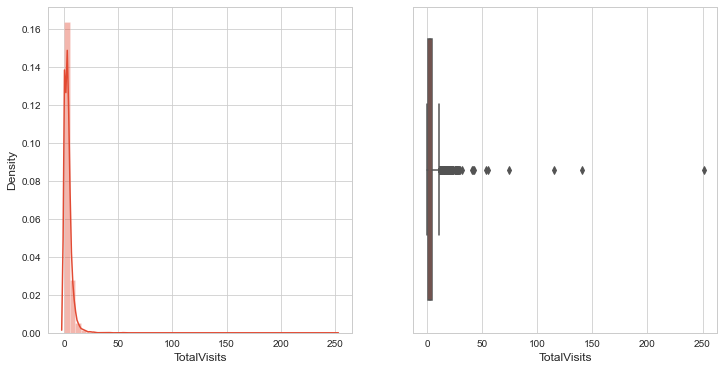

In [91]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

In [92]:
# As we see there are some outliers in the data, we will impute with median and not mean value.
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

#### 5. Page Views Per Visit

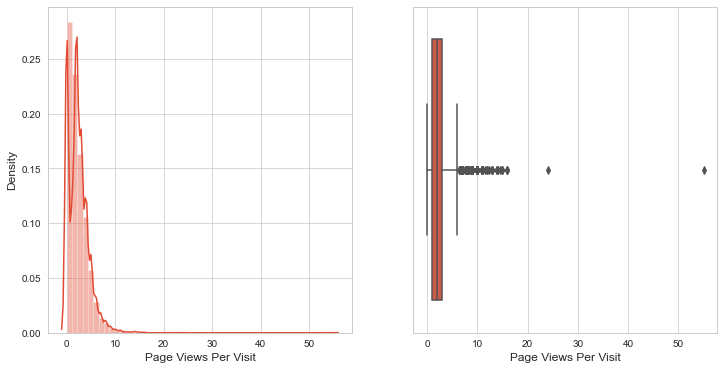

In [93]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [94]:
# As we see there are some outliers in the data, we will impute with median and not mean value.
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

#### 6. Last Activity

In [95]:
# Data distributed of Last Activity
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [96]:
# We will impute the nan values with the mode here , by 'Email Opened'.
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


#### 7. Lead Source

In [97]:
# Data distributed of Lead Source

lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [98]:
# We will replace the nan values with 'Google' here.
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())

Number of null values in Lead Source column is :  0


## Step 5: EDA


In [99]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Receive More Updates About Our Courses         1
I agree to pay the amount through cheque       1
Get updates on DM Content                      1
Magazine                                       1
Update me on Supply Chain Content              1
Newspaper Article                              2
A free copy of Mastering The Interview         2
Digital Advertisement                          2
Through Recommendations                        2
Search                                         2
Converted                                      2
Do Not Call                                    2
Do Not Email                                   2
X Education Forums                             2
Newspaper                                      2
Lead Origin                                    5
What is your current occupation                7
Last Notable Activity                         16
Last Activity                                 17
Lead Source                                   20
TotalVisits         

### Categorical Attributes Analysis:

#### Imbalanced Variables

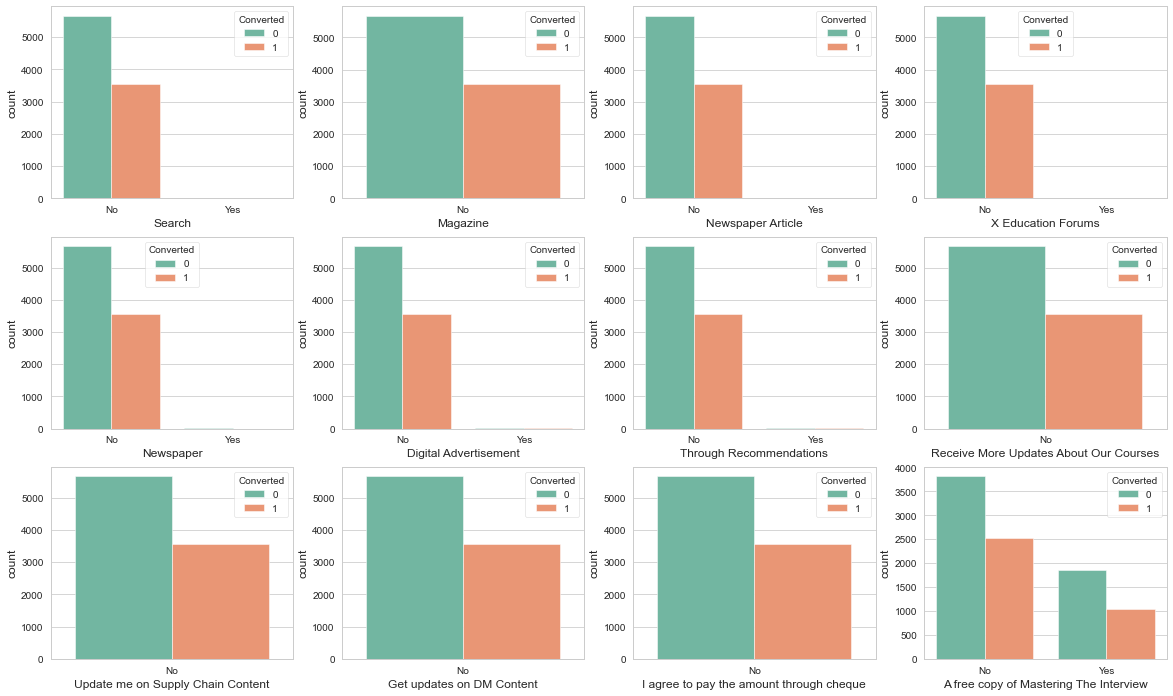

In [100]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = lead, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = lead, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead, ax = axs[2,3],palette = 'Set2')
plt.show()

#### Inference

For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
"A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [101]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

#### 1. Lead Source

In [102]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [103]:
#combining low frequency values to Others

lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Social Media'] ,'Others')

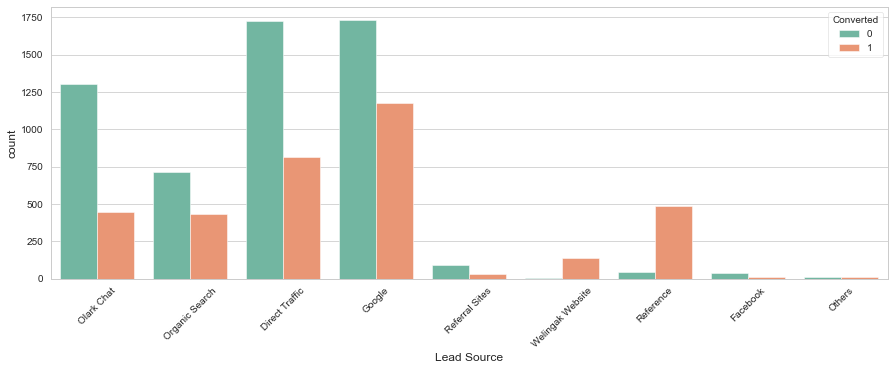

In [104]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

Maximum Leads are generated by Google and Direct Traffic.

Conversion rate of Reference leads and Welinkgak Website leads is very high.

#### 2. What is your current occupation

In [105]:
#checking value counts of 'What is your current occupation' column
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

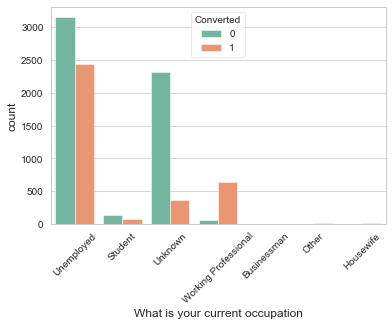

In [106]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

Maximum leads generated are unemployed and their conversion rate is more than 50%.

Conversion rate of working professionals is very high.

#### 3. Last Activity

In [107]:
# checking value counts of Last Activity
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [108]:
#combining low frequency values
lead['Last Activity'] = lead['Last Activity'].replace([ 'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

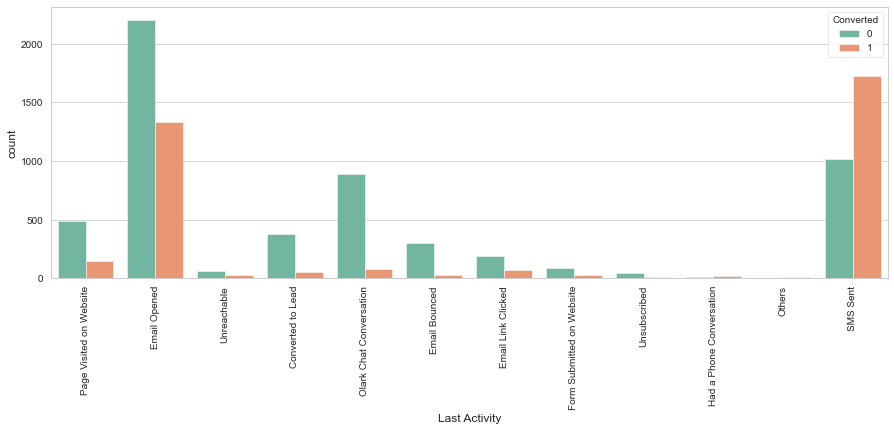

In [109]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate. 

In [110]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Activity']

#### 4. Lead Origin

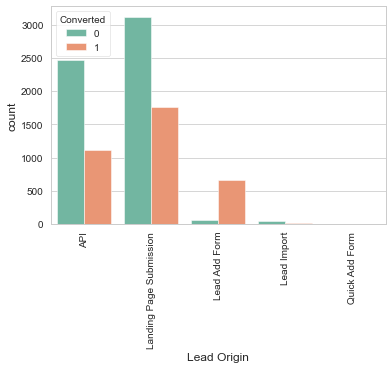

In [111]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

Maximum leads are generated through Landing Page Submission.

Lead Add Form has high conversion rate. 

#### 5. Do Not Email & Do Not Call

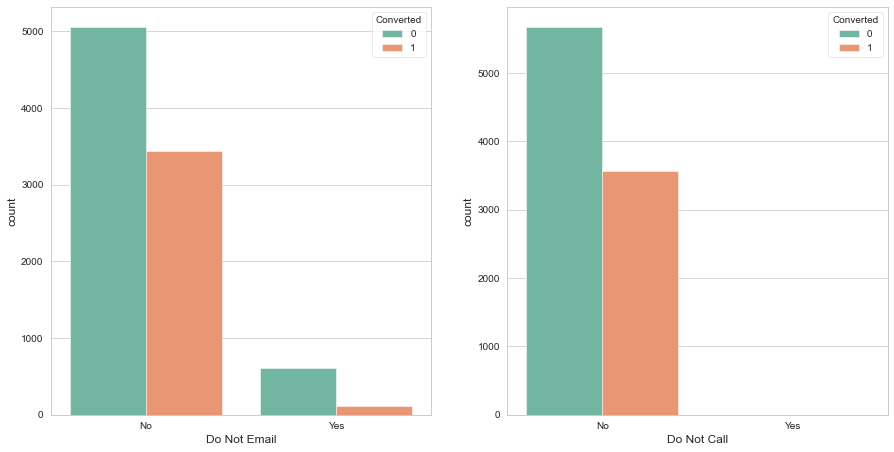

In [112]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, ax = axs[1],palette = 'Set2')
plt.show()

#### Inference

We Can append the Do Not Call Column to the list of Columns to be Dropped data is highly skewed

In [113]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Activity',
 'Do Not Call']

#### 6. Last Notable Activity

In [114]:
#checking value counts of last Notable Activity
lead['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [115]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Marked Spam',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

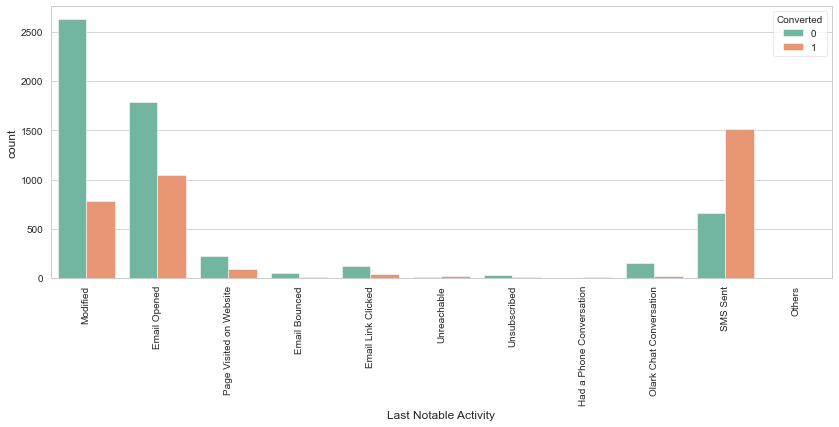

In [116]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate.

In [117]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [118]:
# Append 'Prospect ID' and 'Lead Number' to the cols_to_drop List as this is just a ID
cols_to_drop.append('Prospect ID')

cols_to_drop.append('Lead Number')

# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity',
 'Prospect ID',
 'Lead Number']

In [119]:
#dropping columns
lead = lead.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


In [120]:
#checking dataset
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


In [121]:
lead.shape

(9240, 8)

### Numerical Attributes Analysis:

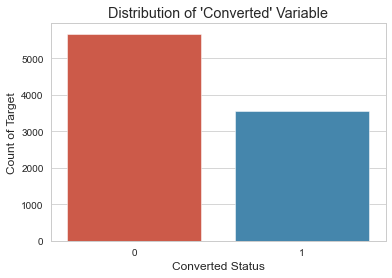

In [122]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(lead.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [123]:
# Finding out conversion rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

#### Inference

Currently, lead Conversion rate is 38% only

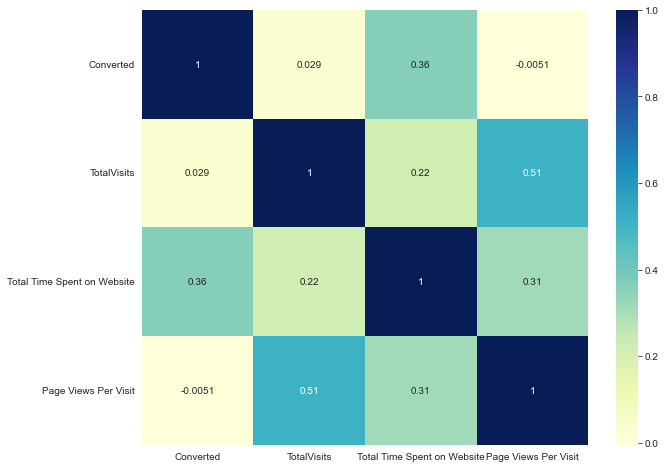

In [124]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### 1. Total Visits

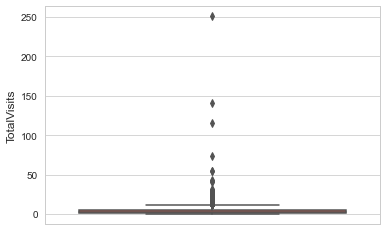

In [125]:
#visualizing spread of variable Total Visits

sns.boxplot(y=lead['TotalVisits'])
plt.show()

####  Inference

Presence of outliers can be seen clearly

In [126]:
#checking percentile values for "Total Visits"

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

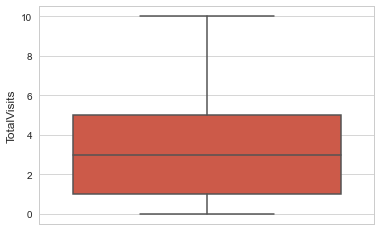

In [127]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=lead['TotalVisits'])
plt.show()

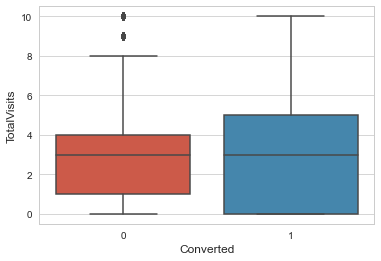

In [128]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

#### Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

#### 2. Total time spent on website

In [129]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

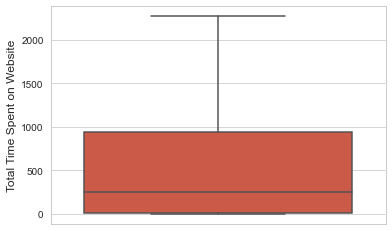

In [130]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = lead['Total Time Spent on Website'])
plt.show()

#### Since there are no major outliers for the above variable, outlier treatment is not required for it

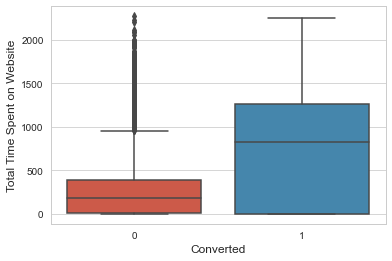

In [131]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

#### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

#### 3. Page views per visit

In [132]:
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

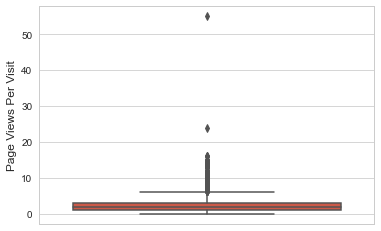

In [133]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =lead['Page Views Per Visit'])
plt.show()

#### Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

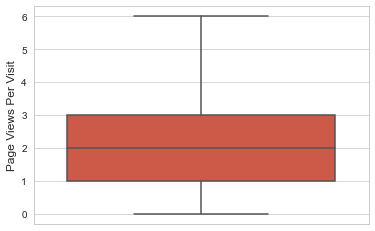

In [134]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

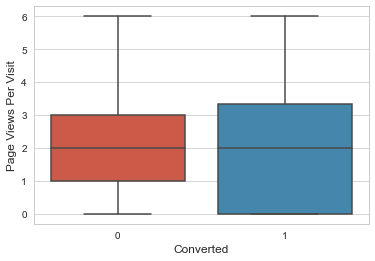

In [135]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

#### Inference

Median for converted and not converted leads is almost same.

Nothing conclusive can be said on the basis of Page Views Per Visit.

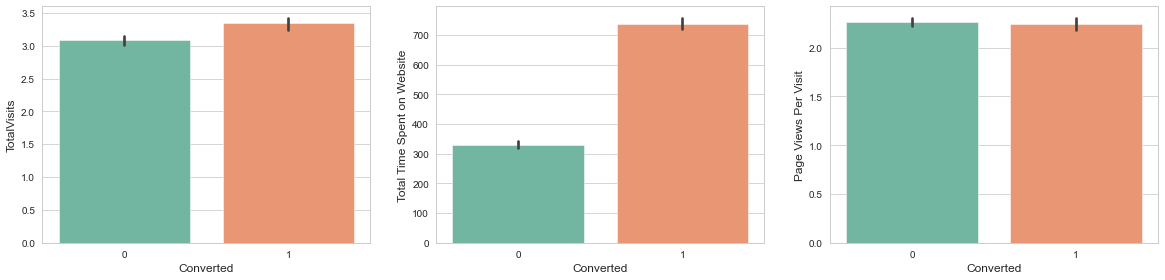

In [136]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead)
plt.show()

#### Inference
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

## Step 6 : Convert Binary Categories

In [137]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                          2
Converted                             2
Lead Origin                           5
What is your current occupation       7
Lead Source                           9
TotalVisits                          11
Page Views Per Visit                 91
Total Time Spent on Website        1731
dtype: int64

In [138]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [139]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [140]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

## Step 7 : Dummy Variable

In [141]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,0,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,1,0,...,0,0,0,0,0,0,0,1,0,0


In [142]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

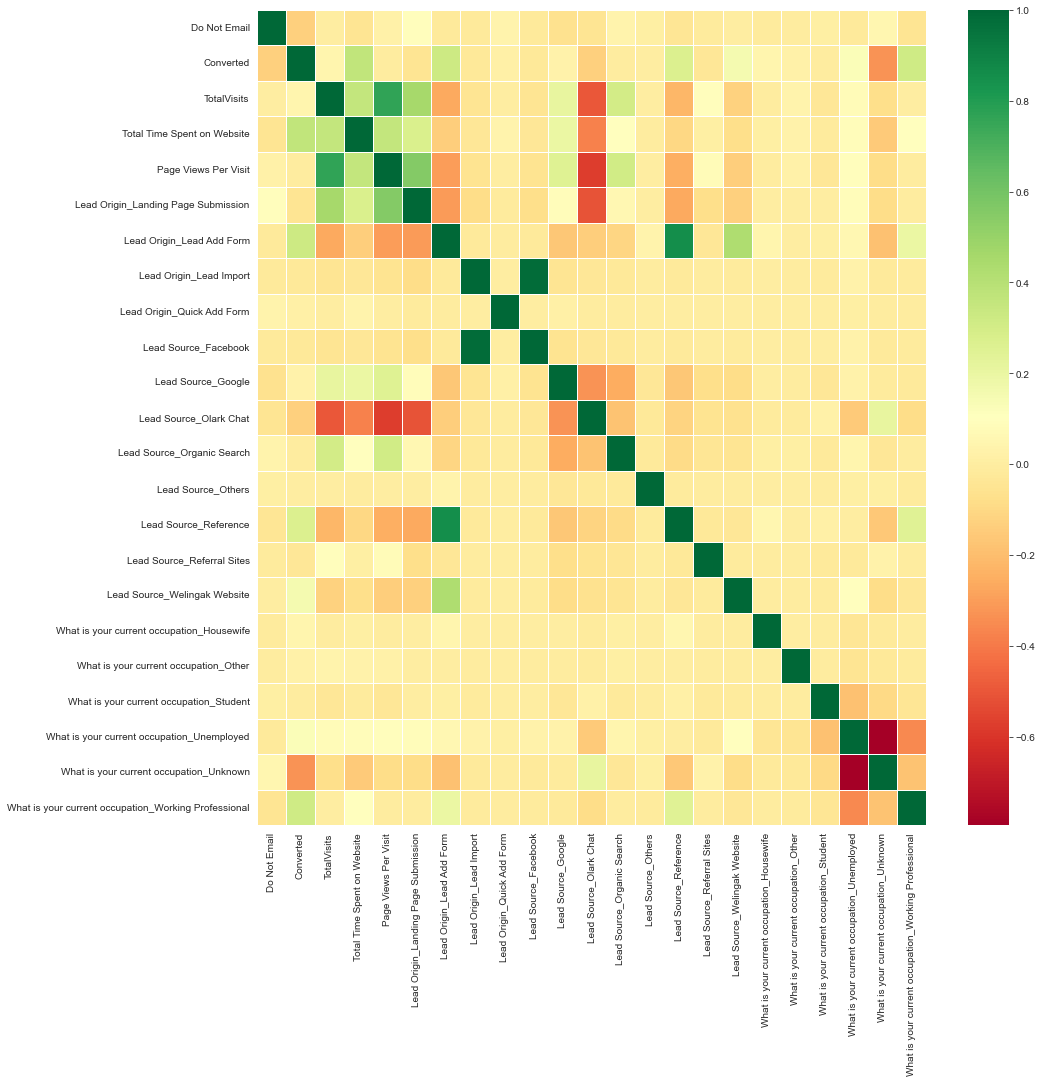

In [143]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

## Step 8. Train- Test Split

In [144]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [145]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 22)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 22)
 Shape of y_test is  :  (2772,)


### Feature Scaling

In [146]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 9. Model Building

### RFE for Feature Reduction

In [157]:
# Using RFE to reduce the feature count from 22 to 15
logreg = LogisticRegression()
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [148]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Origin_Quick Add Form', False, 2),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', False, 2),
 ('What is your current occupation_Unknown', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [149]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [150]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed'],
      dtype='object')

In [151]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

### Manual Feature Reduction

### Model 1

In [152]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.1
Date:                Wed, 12 Oct 2022   Deviance:                       5792.3
Time:                        17:04:34   Pearson chi2:                 7.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3520
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7737      0.044    -17.455      0.000      -0.861      -0.687
Do Not Email                                            -1.3242      0.159     -8.305      0.000      -1.637      -1.012
Total Time Spent on Website                              1.0972      0.038     28.855      0.000       1.023       1.172
Lead Origin_Lead Add Form                                3.1737      0.465      6.824      0.000       2.262       4.085
Lead Source_Olark Chat                                   0.9704      0.095     10.251      0.000       0.785       1.156
Lead Source_Others                                       0.3684      0.624      0.591      0.555      -0.854       1.591
Lead Source_Reference                                    0.3477      0.498      0.698      0.485      -0.629       1.324
Lead Source_Welingak Website                             2.4269      0.853      2.844      0.004       0.755       4.099
What is your current occupation_Housewife               22.3497   1.38e+04      0.002      0.999   -2.69e+04     2.7e+04
What is your current occupation_Other                   -0.6950      0.766     -0.907      0.364      -2.196       0.806
What is your current occupation_Unknown                 -1.2486      0.082    -15.166      0.000      -1.410      -1.087
What is your current occupation_Working Professional     2.5348      0.180     14.072      0.000       2.182       2.888
========================================================================================================================
"""

In [153]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
5,Lead Origin_Lead Add Form,16.99
6,Lead Origin_Lead Import,16.87
8,Lead Source_Facebook,16.85
13,Lead Source_Reference,13.92
19,What is your current occupation_Unemployed,7.51
4,Lead Origin_Landing Page Submission,4.85
20,What is your current occupation_Unknown,4.18
15,Lead Source_Welingak Website,3.99
10,Lead Source_Olark Chat,3.71
3,Page Views Per Visit,3.21


### Model 2

#### We will remove 'What is your current occupation_Housewife' feature due to high P-value of 0.999

In [154]:
features.remove('What is your current occupation_Housewife') # Remove 'What is your current occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.1
Date:                Wed, 12 Oct 2022   Deviance:                       5802.1
Time:                        17:04:34   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3510
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7687      0.044    -17.372      0.000      -0.855      -0.682
Do Not Email                                            -1.3281      0.159     -8.329      0.000      -1.641      -1.016
Total Time Spent on Website                              1.0967      0.038     28.859      0.000       1.022       1.171
Lead Origin_Lead Add Form                                3.1701      0.465      6.815      0.000       2.258       4.082
Lead Source_Olark Chat                                   0.9663      0.095     10.214      0.000       0.781       1.152
Lead Source_Others                                       0.3656      0.624      0.586      0.558      -0.857       1.589
Lead Source_Reference                                    0.3628      0.498      0.728      0.467      -0.614       1.340
Lead Source_Welingak Website                             2.4259      0.853      2.843      0.004       0.754       4.098
What is your current occupation_Other                   -0.6989      0.766     -0.912      0.362      -2.200       0.802
What is your current occupation_Unknown                 -1.2521      0.082    -15.211      0.000      -1.413      -1.091
What is your current occupation_Working Professional     2.5301      0.180     14.045      0.000       2.177       2.883
========================================================================================================================
"""

In [155]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Lead Add Form,16.37
5,Lead Source_Reference,13.46
6,Lead Source_Welingak Website,3.89
3,Lead Source_Olark Chat,1.34
8,What is your current occupation_Unknown,1.24
1,Total Time Spent on Website,1.18
9,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.05
4,Lead Source_Others,1.05
7,What is your current occupation_Other,1.00


### Model 3

#### We will remove 'Lead Source_Referral Sites' feature due to high P-value of 0.432

In [156]:
features.remove('Lead Source_Referral Sites')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

ValueError: list.remove(x): x not in list

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

### Model 4 

#### We will remove 'Lead Source_Others	' feature due to high P-value of 0.390

In [ ]:
features.remove('Lead Source_Others')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

### Model 5

#### We will remove 'Lead Source_Reference ' feature due to high P-value of 0.248

In [ ]:
features.remove('Lead Source_Reference')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

### Model 6 

#### We will remove 'What is your current occupation_Working Professional' feature due to high P-value of 0.089

In [ ]:
features.remove('What is your current occupation_Working Professional')
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Step 10. Model Evaluation : Train Dataset

In [ ]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

### Predicted Probability Calculation

In [ ]:
# Getting the predicted values on the train set
y_train_pred =log_model6.predict( X_train_sm6)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_Value':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_Value'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_Value'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.317, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

In [ ]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.317 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

In [ ]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

### Confusion Matrix

In [ ]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'], "GnBu")

In [ ]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'] ) )

#### Inference
Model 6 provides an accuracy 78.26%, Sensitivity 81.67%. More than 80% is what the CEO has requested in this case study.

### ROC Curve

In [ ]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_Value'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

In [ ]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_Value'], y_train_pred_final['Converted_Prob'])

#### Inference 
ROC curve area is 0.86, which indicates that the model is good.

### Precision - Recall Trade off

#### 
Next we will look into Precision- Recall trade off to see if balancing these values provides better output.
Precision means out of all leads which are predicted at 1, how many have truly converted.
Recall means out of all leads that have converted, how many of them were correctly identifies as 1. This is the same value as sensitivity.

Precision-Recall trade-off point is used to decide the cut-off point especially when there is huge imbalance in data. In our case the data distribution is 62% vs 38%. So imbalance of data is not a big factor.

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_Value'], y_train_pred_final['Converted_Prob'])

In [ ]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.317, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

In [ ]:
# plotting the Train dataset again with 0.317 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.317 else 0)
y_train_pred_final.head()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_2'], "GnBu")

In [ ]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_2'] ) )

## Step 11. Model Evalution : Test Dataset 

In [ ]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

In [ ]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

In [ ]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

In [ ]:
# Predicting the final test model 
y_test_pred = log_model6.predict(X_test_sm)

In [ ]:
#checking the top 10 rows
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_Value'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted_Value','Converted_Prob'], axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.317 else 0)
y_pred_final.head()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_Value'], y_pred_final['final_predicted'], "GnBu")

In [ ]:
conf_matrix = confusion_matrix(y_pred_final['Converted_Value'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

#### Inference
The Sensitivity value on Test data is 83.2% vs 81.67% in Train data. The accuracy values is 78.72%. It shows that model is performing well in test data set also and is not over-trained.

In [ ]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_Value'], y_pred_final['Converted_Prob'])

#### Inference
ROC value of 0.86 shows the model is performing well in Test dataset.

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_Value'], y_pred_final['final_predicted'] ) )

In [ ]:
# checking the data from top 
y_pred_final.head(5)

In [ ]:
# checking the data from bottom 
y_pred_final.tail(5)

## Step 12. Conclusion

In [ ]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model6.params[1:]
final_parameters

In [ ]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors.sort_values()

#### Major indicators that a lead will get converted to a hot lead:

Lead Origin_Lead Add Form : A lead sourced from Lead Origin_Lead Add Form is more likely to get converted

Lead_Source_Welingak website : A lead sourced from Welingak Website is more likely to get converted.

Lead Source_Olark Chat :A lead sourced from Olark Chat is more likely to get converted

#### Major indicators that a lead will NOT get converted to a hot lead:
What is your current occupation_Unknown are less likely to get converted into hot leads.

What is your current occupation_Other are less likely to get converted into hot leads .

What is your current occupation_Student are less likely to get converted into hot leads .

Recommendations:
The company should use a leads score threshold of 38 to identify "Hot Leads" as at this threshold, Sensitivity Score of the model is around 80% which is as good as CEO's target of 80%.